In [1]:
import pandas as pd
df = pd.read_csv('heart.csv')
print(df)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2   2     3       0  
1         0

In [2]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [3]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


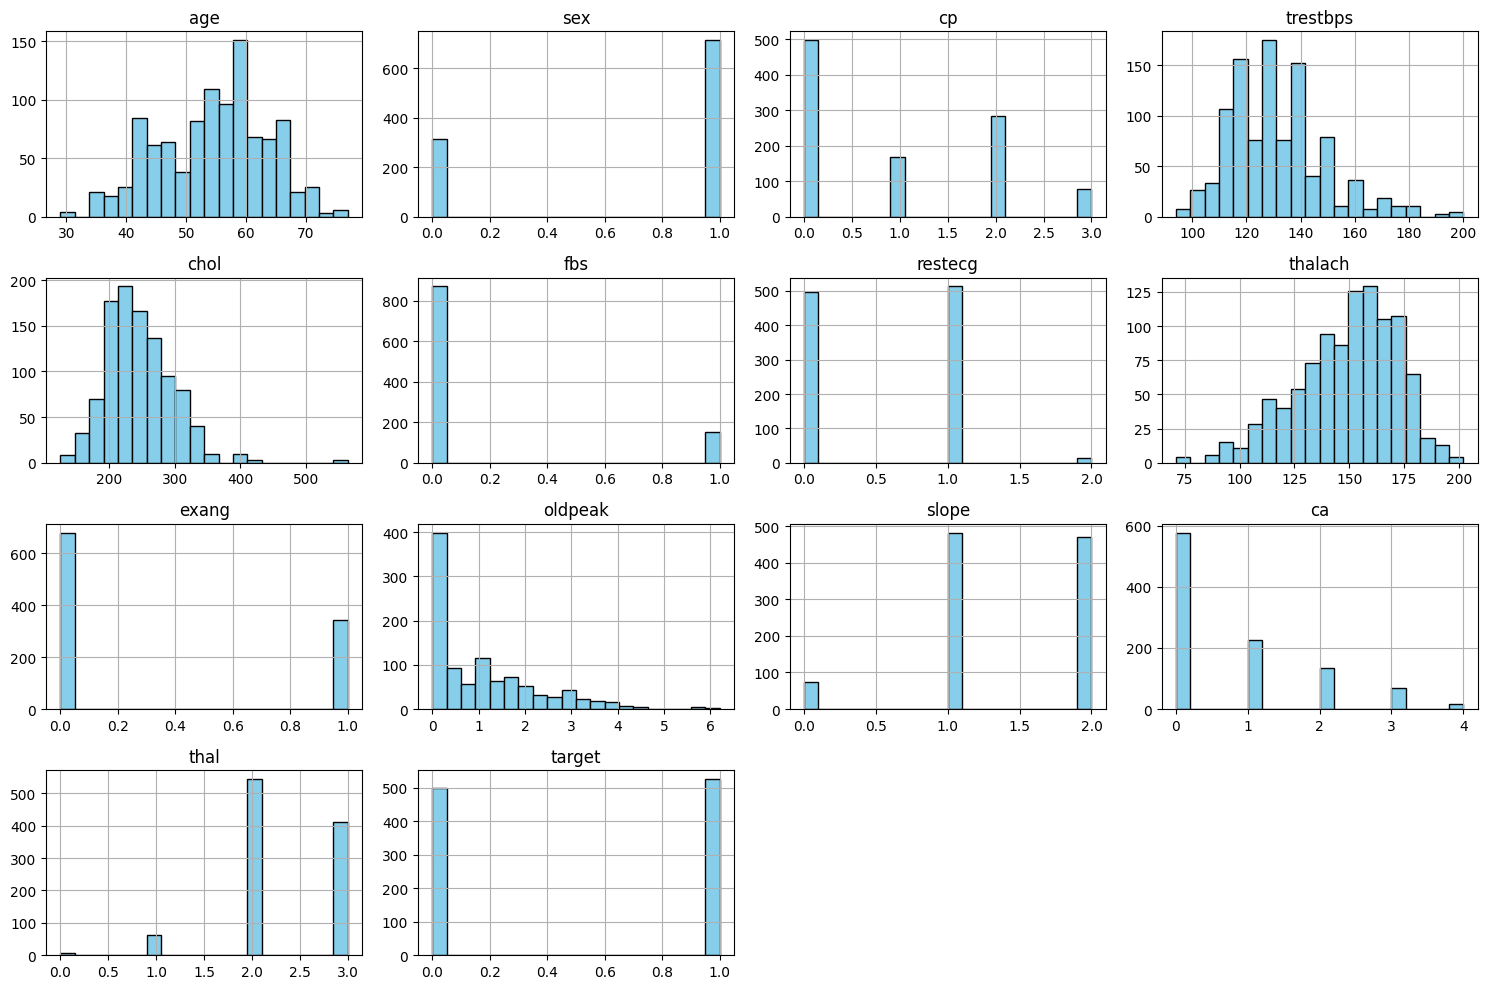

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

df.hist(figsize=(15, 10), bins=20, color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()

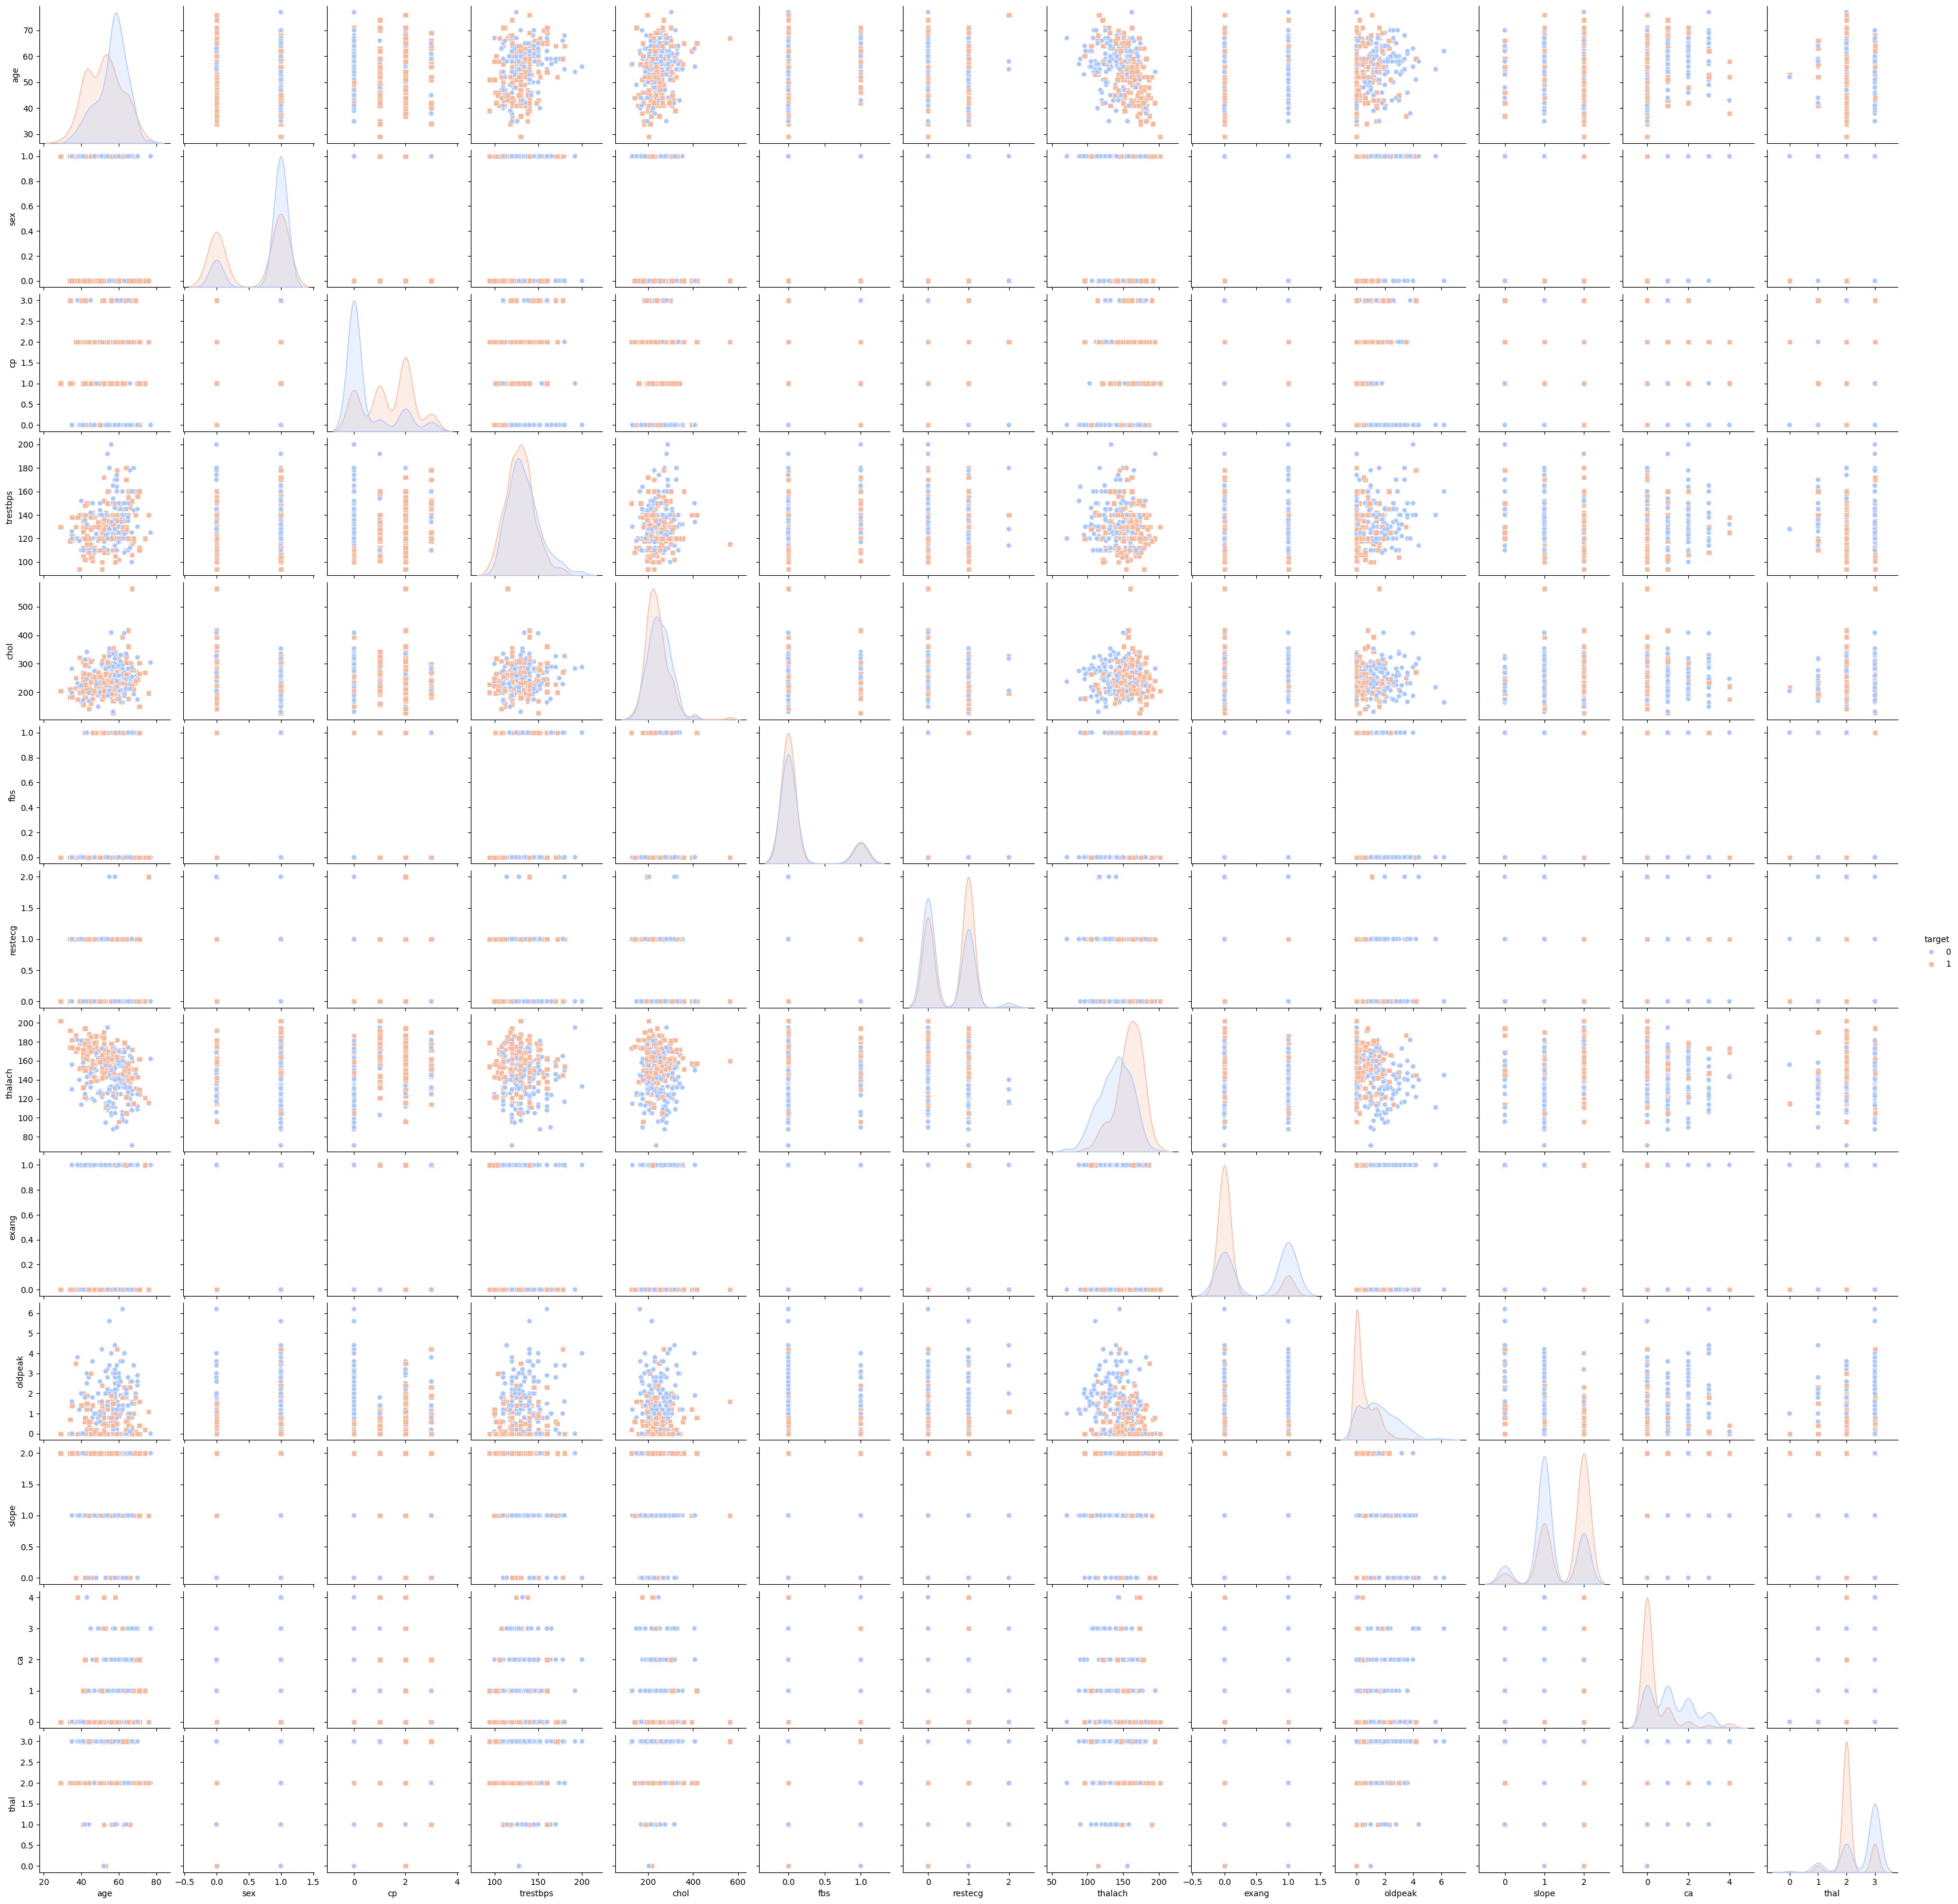

In [6]:
sns.pairplot(df, hue='target', palette='coolwarm', markers=["o", "s"])
plt.show()

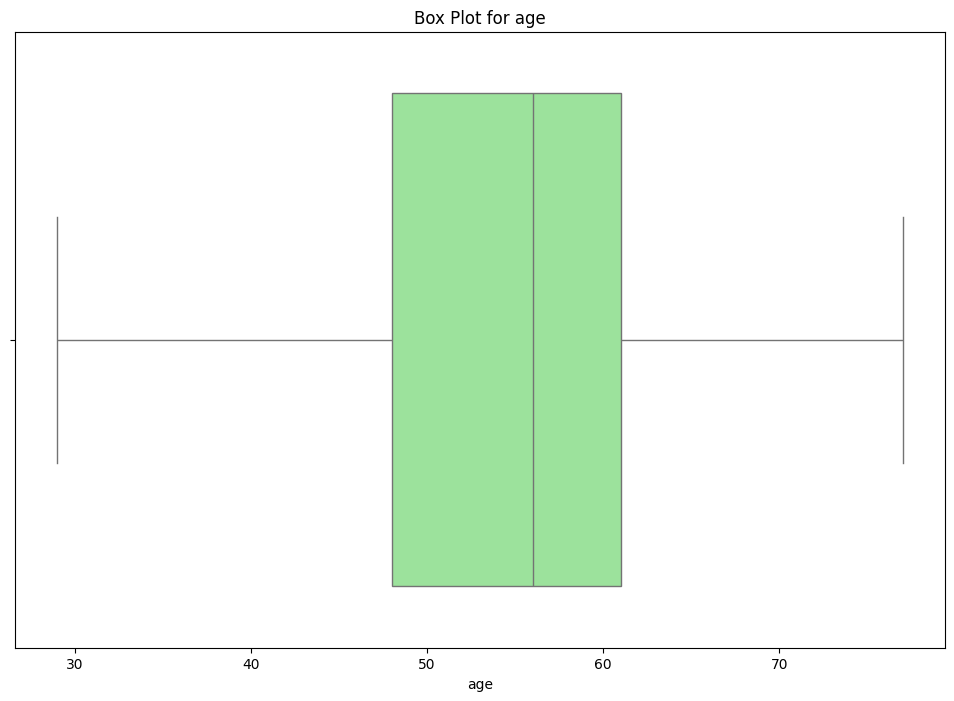

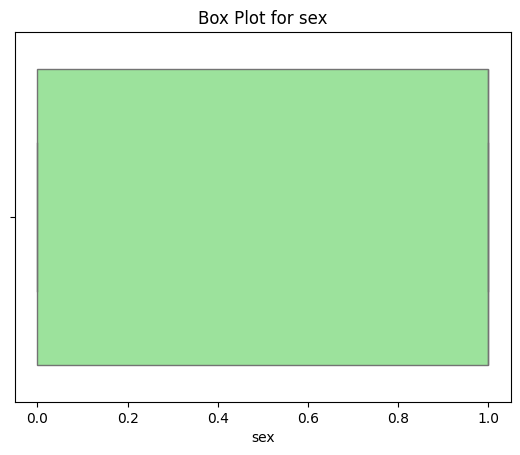

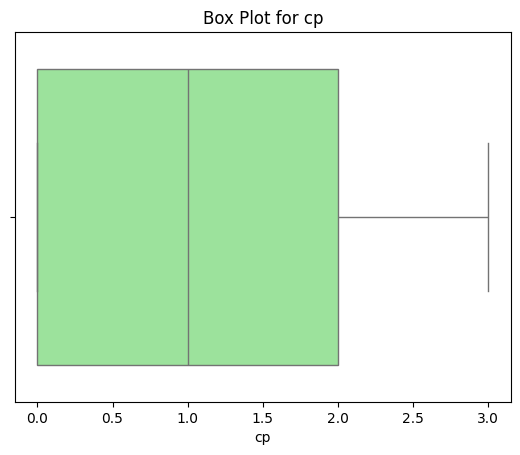

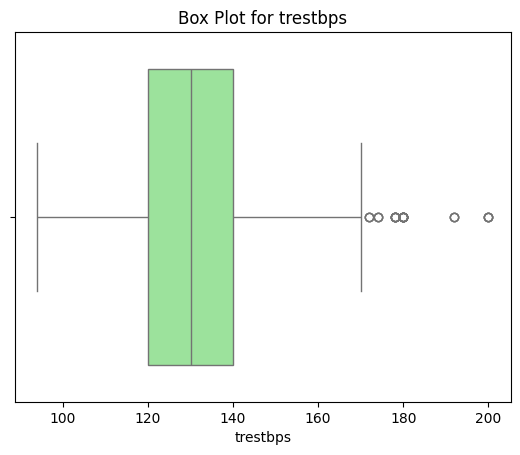

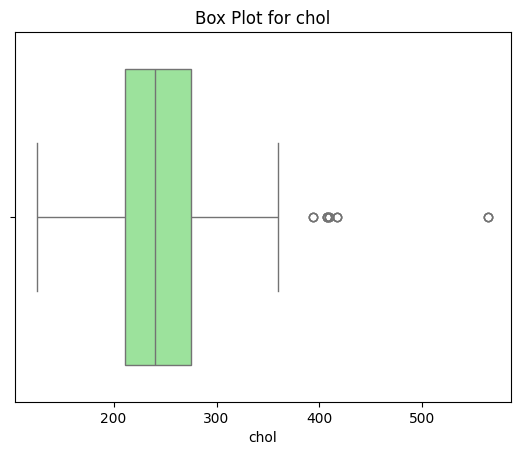

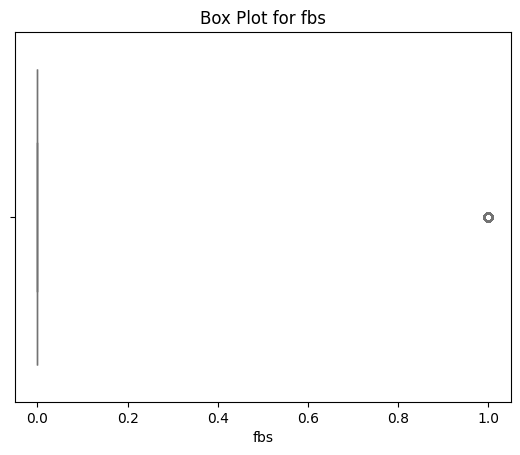

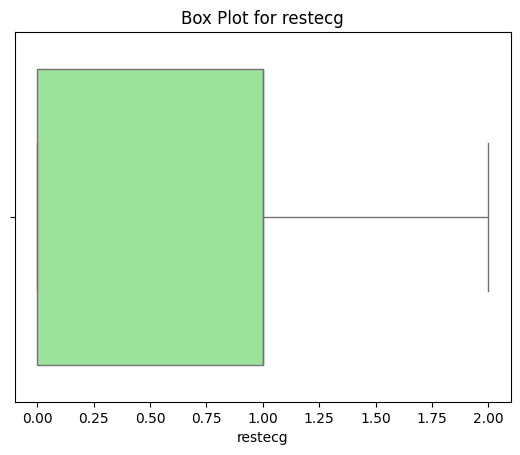

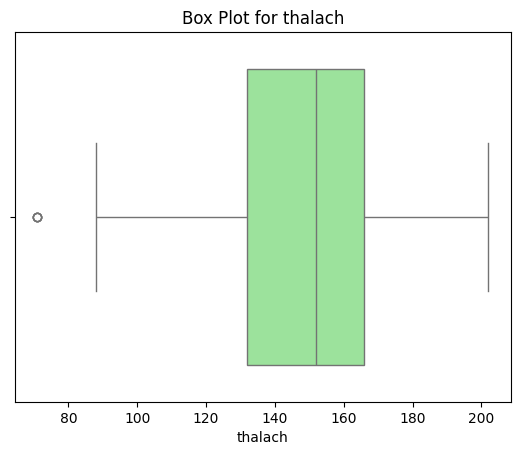

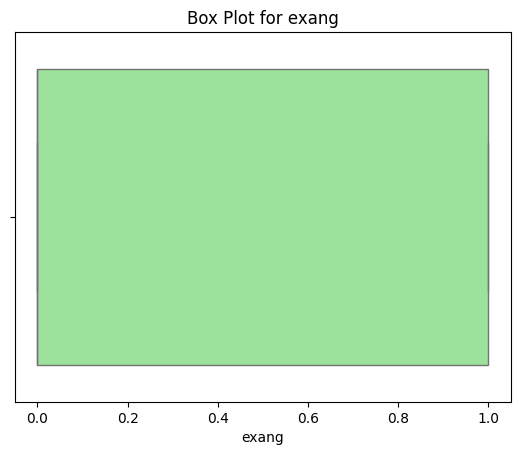

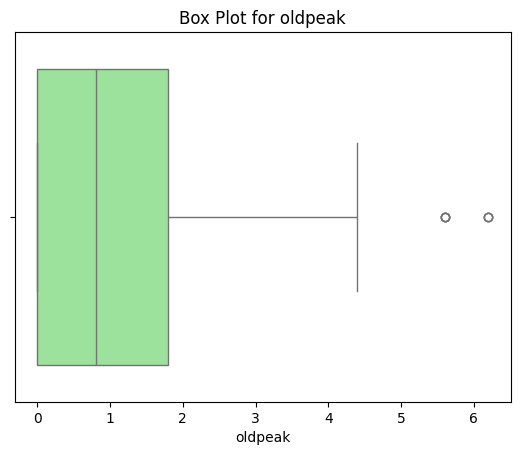

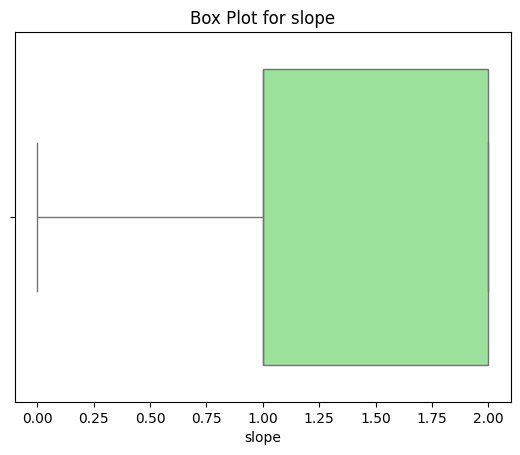

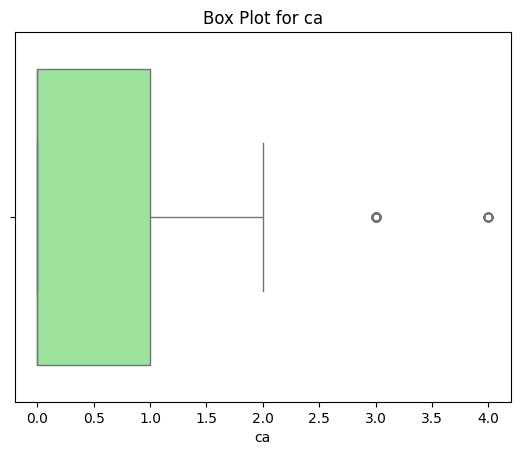

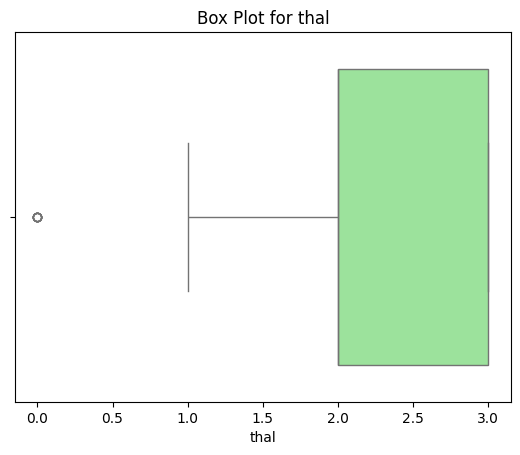

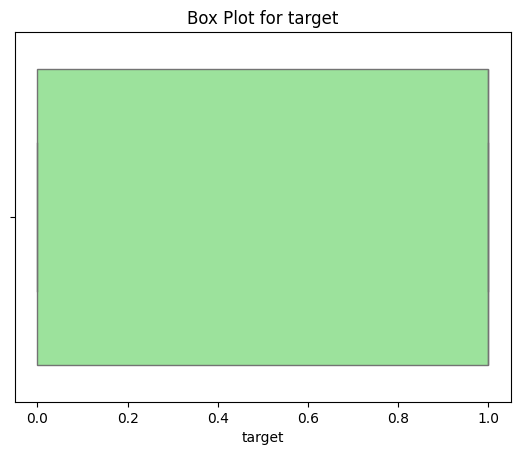

In [7]:
plt.figure(figsize=(12, 8))
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'Box Plot for {col}')
    plt.show()


Logistic Regression Evaluation:
Accuracy: 0.7951
Precision: 0.7563
Recall: 0.8738
F1 Score: 0.8108
Confusion Matrix:
[[73 29]
 [13 90]]


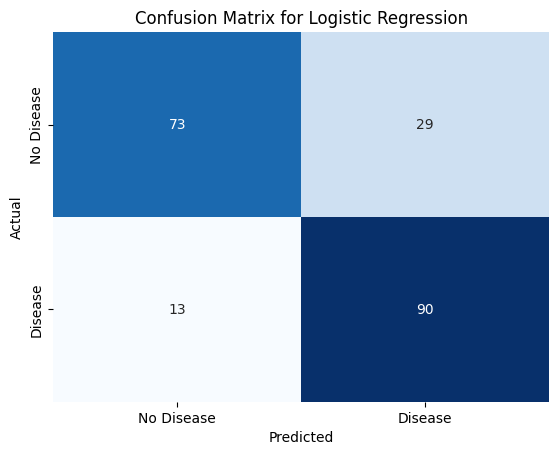

In [13]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

df = pd.get_dummies(df, drop_first=True)

X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)

precision = precision_score(y_test, y_pred)

recall = recall_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)

print(f"Logistic Regression Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Confusion Matrix:\n{cm}")

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Decision Tree Evaluation:
Accuracy: 0.9854
Precision: 1.0000
Recall: 0.9709
F1 Score: 0.9852
Confusion Matrix:
[[102   0]
 [  3 100]]


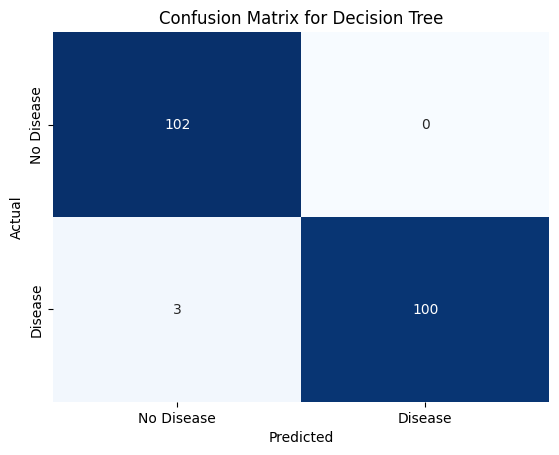

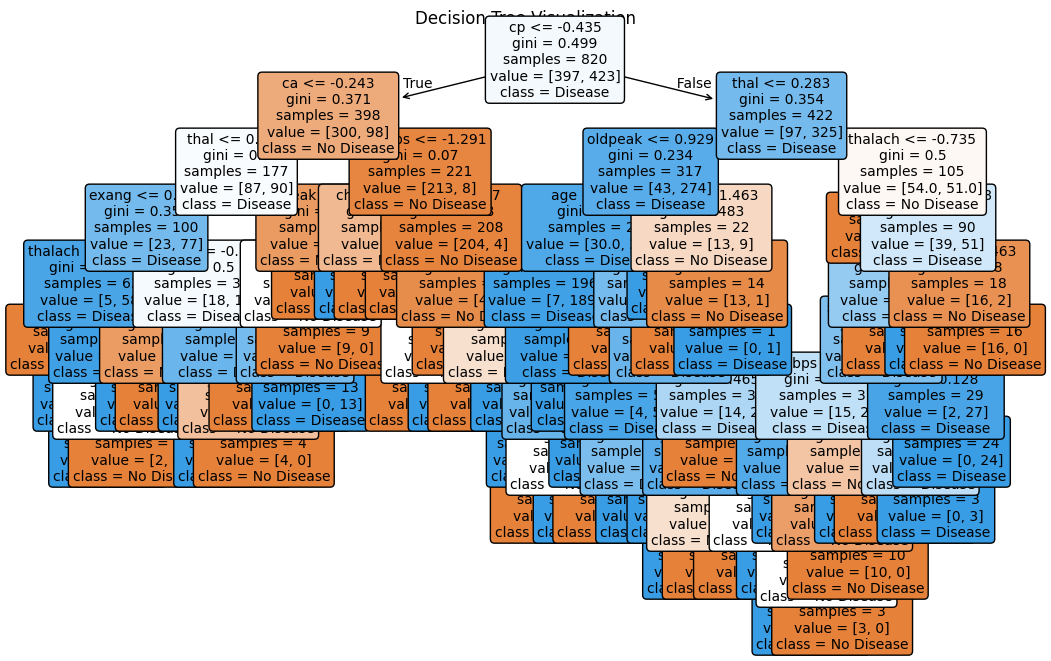

In [14]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

precision = precision_score(y_test, y_pred)

recall = recall_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)

print(f"Decision Tree Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Confusion Matrix:\n{cm}")

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Step 9: Plot the Decision Tree (Optional)
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=['No Disease', 'Disease'],
          rounded=True, fontsize=10)
plt.title("Decision Tree Visualization")
plt.show()

Random Forest Evaluation:
Accuracy: 0.9854
Precision: 1.0000
Recall: 0.9709
F1 Score: 0.9852
Confusion Matrix:
[[102   0]
 [  3 100]]


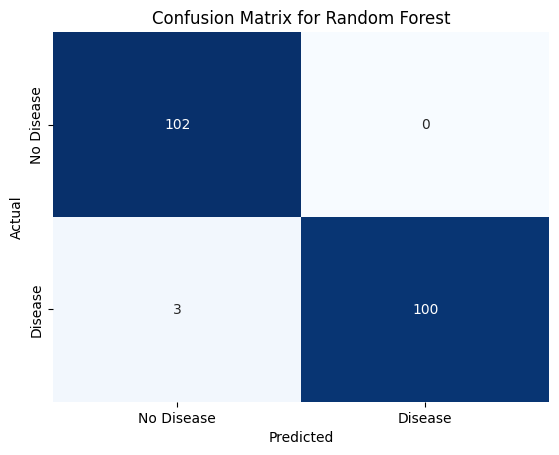

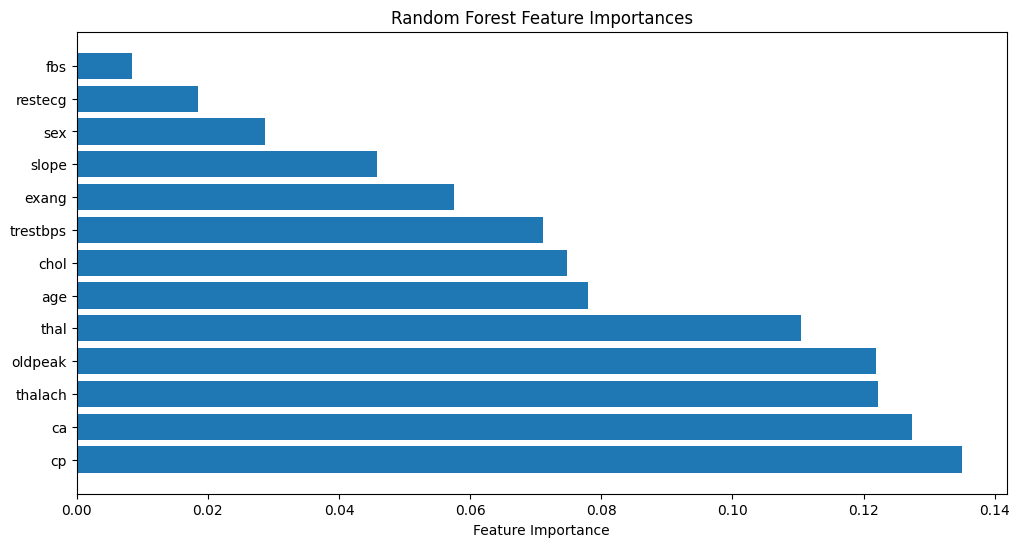

In [15]:
rf_model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=None)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)


precision = precision_score(y_test, y_pred)


recall = recall_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)

print(f"Random Forest Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Confusion Matrix:\n{cm}")

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]


plt.figure(figsize=(12, 6))
plt.barh(range(X.shape[1]), importances[indices], align="center")
plt.yticks(range(X.shape[1]), X.columns[indices])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importances")
plt.show()

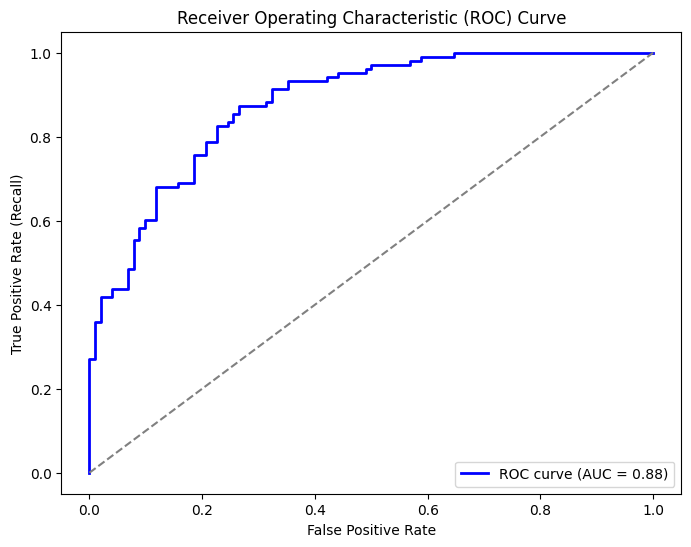

In [22]:
from sklearn.metrics import roc_curve, auc
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg_model = LogisticRegression(random_state=42, max_iter=1000)
log_reg_model.fit(X_train_scaled, y_train)

y_prob = log_reg_model.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [24]:
from sklearn.model_selection import GridSearchCV

log_reg_params = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

log_reg_grid = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), log_reg_params, cv=5, verbose=1, n_jobs=-1)
log_reg_grid.fit(X_train_scaled, y_train)

print("Best Hyperparameters for Logistic Regression:", log_reg_grid.best_params_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters for Logistic Regression: {'C': 1, 'solver': 'liblinear'}


Fitting 5 folds for each of 648 candidates, totalling 3240 fits
Best Hyperparameters for Decision Tree: {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}


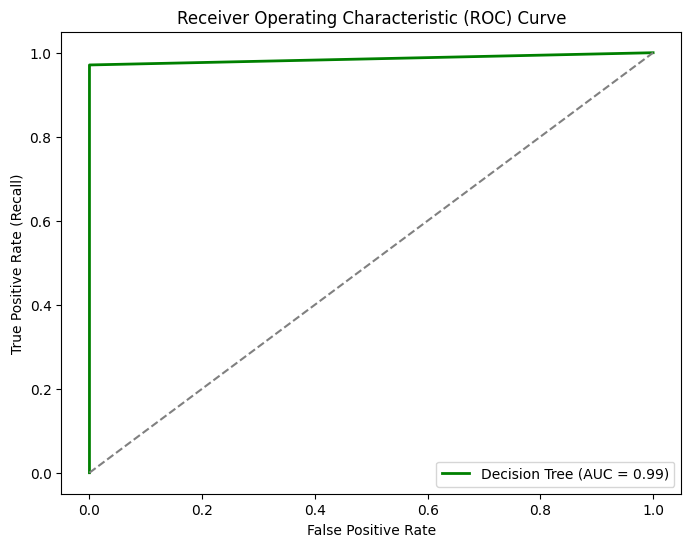


Classification Report for Best Decision Tree Model:


NameError: name 'classification_report' is not defined

In [25]:
dt_params = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'max_features': [None, 'sqrt', 'log2'],
    'splitter': ['best', 'random']
}

dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_params, cv=5, verbose=1, n_jobs=-1)

dt_grid.fit(X_train, y_train)

print("Best Hyperparameters for Decision Tree:", dt_grid.best_params_)

dt_best = dt_grid.best_estimator_

y_prob_dt = dt_best.predict_proba(X_test)[:, 1]


fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, color='green', lw=2, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

y_pred_dt = dt_best.predict(X_test)
print("\nClassification Report for Best Decision Tree Model:")
print(classification_report(y_test, y_pred_dt))

In [8]:
print("OK")

OK


The analysis demonstrated that Random Forest is the best performing model for predicting heart disease in this dataset, providing a good balance between accuracy, precision, recall, and generalizability. While logistic regression is useful as a baseline model, more complex models like Decision Trees and Random Forests offer better performance. Hyperparameter tuning has shown substantial improvements in model performance, and further fine-tuning and exploring advanced models could provide even better results. The primary challenge was dealing with the class imbalance, but by using appropriate metrics and techniques like hyperparameter tuning and cross-validation, we were able to improve the model’s predictive power and ensure that the model performs well in identifying heart disease cases.